## Get all helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-31 12:21:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-31 12:21:02 (83.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [71]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, compare_historys


## Download images

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2021-12-31 12:21:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   196MB/s    in 0.8s    

2021-12-31 12:21:06 (196 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# check out how many images
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf

IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size= IMAGE_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data 

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [8]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
# for images, labels in train_data.take(1):
#   print(images.shape,labels)


In [10]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x = base_model(inputs)

print(f"shape after base model:{x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="gloabal_avarage_pool_layer")(x)

print(f"shape after average pooling 2d:{x.shape}")

outputs = tf.keras.layers.Dense(10,activation="softmax",name="out_put_layer")(x)


model_0 = tf.keras.Model(inputs,outputs)


#compile model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

hist_1 = model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback("keras_hub","efficientnetb0")])






16719872/16705208 [==============================] - 0s 0us/step
shape after base model:(None, 7, 7, 1280)
shape after average pooling 2d:(None, 1280)
Saving TensorBoard log files to: keras_hub/efficientnetb0/20211231-122115


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/5
24/24 [==============================] - 24s 312ms/step - loss: 1.8728 - accuracy: 0.4000 - val_loss: 1.3708 - val_accuracy: 0.6840
Epoch 2/5
24/24 [==============================] - 6s 226ms/step - loss: 1.1366 - accuracy: 0.7480 - val_loss: 0.9437 - val_accuracy: 0.7808
Epoch 3/5
24/24 [==============================] - 6s 227ms/step - loss: 0.8448 - accuracy: 0.8053 - val_loss: 0.7668 - val_accuracy: 0.8200
Epoch 4/5
24/24 [==============================] - 5s 225ms/step - loss: 0.6787 - accuracy: 0.8360 - val_loss: 0.6747 - val_accuracy: 0.8292
Epoch 5/5
24/24 [==============================] - 6s 225ms/step - loss: 0.5939 - accuracy: 0.8547 - val_loss: 0.6181 - val_accuracy: 0.8348


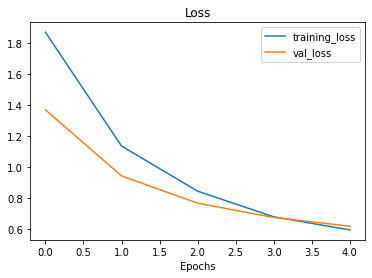

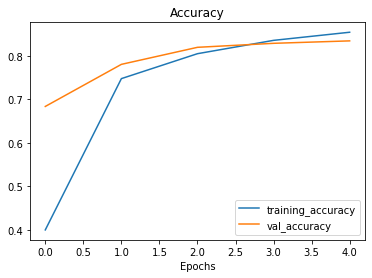

In [11]:
plot_loss_curves(hist_1)

In [12]:
for n, layer in enumerate(base_model.layers):
  print(n,layer.name)


0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [14]:
 model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 gloabal_avarage_pool_layer   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 out_put_layer (Dense)       (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## Getting a feature vector from a pretrained model

In [15]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
input_tensor.shape

TensorShape([1, 4, 4, 3])

In [16]:
global_average_pooing_2d = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooing_2d.shape

TensorShape([1, 3])

In [17]:
global_average_pooing_2d = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
global_average_pooing_2d.shape

TensorShape([1, 3])

In [18]:
#Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-12-31 12:22:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   161MB/s    in 0.8s    

2021-12-31 12:22:03 (161 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [19]:
train_dir_1 = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1,
                                                                   image_size =IMAGE_SIZE,
                                                                   label_mode="categorical",
                                                                   batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [21]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(.2),
    preprocessing.RandomZoom(.2),
    preprocessing.RandomHeight(.2),
    preprocessing.RandomWidth(.2)
],name="data_augmentation")

## Visualize Data Augmentation

Text(0.5, 1.0, 'Augmented random image from:479789.jpg')

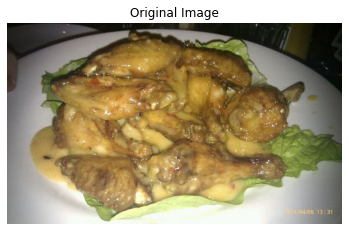

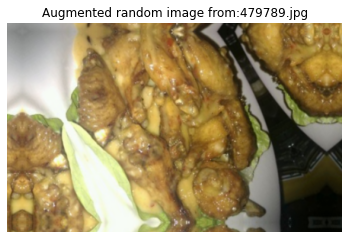

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import os
import random

target_class = random.choice(train_data_1.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original Image")
plt.axis(False)

augemented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(augemented_img[0]/255)
plt.axis(False)
plt.title(f"Augmented random image from:{random_image}")

In [31]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [32]:
inputs = layers.Input(shape=input_shape,name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10,activation="softmax",name="ouput_layer")(x)

# Make a model
model_1 = keras.Model(inputs,outputs)


model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

hist_2 = model_1.fit(train_data_1,
            steps_per_epoch=len(train_data_1),
            epochs=5,
            validation_steps=int(0.25*len(test_data)),
            validation_data=test_data,
            callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20211231-125412
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 13s 2s/step - loss: 2.3907 - accuracy: 0.1143 - val_loss: 2.2306 - val_accuracy: 0.1513
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1625 - accuracy: 0.2286 - val_loss: 2.0987 - val_accuracy: 0.2286
Epoch 3/5
3/3 [==============================] - 2s 736ms/step - loss: 1.9266 - accuracy: 0.4429 - val_loss: 1.9912 - val_accuracy: 0.3224
Epoch 4/5
3/3 [==============================] - 2s 728ms/step - loss: 1.7859 - accuracy: 0.4857 - val_loss: 1.9055 - val_accuracy: 0.3668
Epoch 5/5
3/3 [==============================] - 2s 712ms/step - loss: 1.6120 - accuracy: 0.6286 - val_loss: 1.8211 - val_accuracy: 0.4128


In [25]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 ouput_layer (Dense)         (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [26]:
model_1.evaluate(test_data)

79/79 [==============================] - 5s 59ms/step - loss: 1.8272 - accuracy: 0.4276


[1.8271576166152954, 0.4275999963283539]

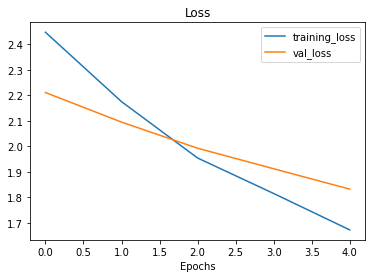

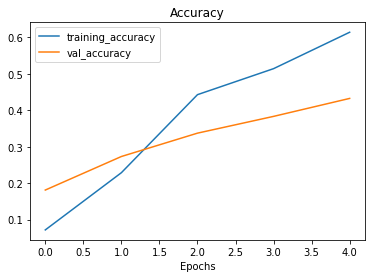

In [27]:
plot_loss_curves(hist_2)

## Model2: Feature extraction learning model 10% of data augmentation


In [28]:
train_dir_10 = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test" 

In [29]:
import tensorflow as tf
IMAGE_SIZE = (224,224)

train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10,
                                                                    image_size= IMAGE_SIZE,
                                                                    label_mode="categorical",
                                                                    batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Create a model

In [85]:
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = keras.Input(shape=(224,224,3),name="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

In [86]:
# set checkpoint path
checkpoint = "10_percent_model_checkpoints_weight/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint,
    save_weights_only=True,
    save_best_only=False,
    save_freq="epoch",
    verbose=1
)

In [87]:
hist_3 = model_2.fit(train_data_10,
        epochs=5,
        steps_per_epoch=len(train_data_10),
        validation_steps=len(test_data),
        validation_data= test_data,
        callbacks=[create_tensorboard_callback("transfer_learning","model_2"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2/20211231-150529
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0326 - accuracy: 0.3173
Epoch 00001: saving model to 10_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 15s 323ms/step - loss: 2.0326 - accuracy: 0.3173 - val_loss: 1.5241 - val_accuracy: 0.6212
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3718 - accuracy: 0.6653
Epoch 00002: saving model to 10_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 6s 265ms/step - loss: 1.3718 - accuracy: 0.6653 - val_loss: 1.0727 - val_accuracy: 0.7560
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0484 - accuracy: 0.7453
Epoch 00003: saving model to 10_percent_model_checkpoints_weight/checkpoint.ckpt
24/24 [==============================] - 6s 264ms/step - loss: 1.0484 - accuracy: 0.7453 - val_loss: 0.8703 - val_accuracy: 0.7912
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9240 - accuracy: 0.7533
E

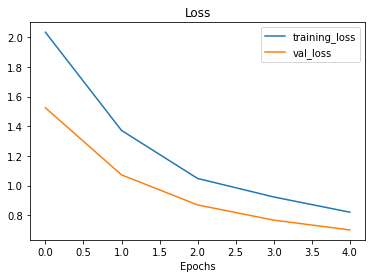

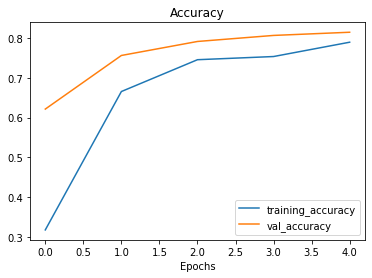

In [88]:
plot_loss_curves(hist_3)

## Load check_pointed weights

In [89]:
model_2.evaluate(test_data)

79/79 [==============================] - 4s 50ms/step - loss: 0.7021 - accuracy: 0.8144


[0.7020739912986755, 0.8144000172615051]

In [90]:
model_2.load_weights(checkpoint)

In [91]:
model_2.evaluate(test_data)

79/79 [==============================] - 4s 52ms/step - loss: 0.7021 - accuracy: 0.8144


[0.7020739316940308, 0.8144000172615051]

## Model 3 fine turning on the existing 10% data

In [92]:
for i,layer in enumerate(model_2.layers):
  print(i,layer,layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fd25d48dcd0> True
1 <keras.engine.sequential.Sequential object at 0x7fd577ec4110> True
2 <keras.engine.functional.Functional object at 0x7fd25cf00a90> False
3 <keras.layers.pooling.GlobalAveragePooling2D object at 0x7fd25d4591d0> True
4 <keras.layers.core.dense.Dense object at 0x7fd25cecaa10> True


In [93]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [94]:
print(len(model_2.layers[2].trainable_variables))

0


## Set last 10 layer to True

In [95]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [96]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_8 False
rescaling_7 False
normalization_7 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False

In [97]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_6   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [99]:
print(len(model_2.trainable_variables))
hist_3.epoch[-1]

12


4

In [100]:
hist_fine_3 = model_2.fit(train_data_10,
                          epochs=10,
                          initial_epoch=hist_3.epoch[-1],
                          steps_per_epoch=len(train_data_10),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[create_tensorboard_callback("fine_tuning_10","model_2_fine")])

Saving TensorBoard log files to: fine_tuning_10/model_2_fine/20211231-150746
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 14s 314ms/step - loss: 0.6720 - accuracy: 0.8187 - val_loss: 0.5677 - val_accuracy: 0.8232
Epoch 6/10
24/24 [==============================] - 7s 267ms/step - loss: 0.5616 - accuracy: 0.8293 - val_loss: 0.5350 - val_accuracy: 0.8300
Epoch 7/10
24/24 [==============================] - 6s 257ms/step - loss: 0.4933 - accuracy: 0.8493 - val_loss: 0.5202 - val_accuracy: 0.8324
Epoch 8/10
24/24 [==============================] - 6s 257ms/step - loss: 0.4409 - accuracy: 0.8667 - val_loss: 0.5148 - val_accuracy: 0.8312
Epoch 9/10
24/24 [==============================] - 6s 255ms/step - loss: 0.4053 - accuracy: 0.8653 - val_loss: 0.5036 - val_accuracy: 0.8328
Epoch 10/10
24/24 [==============================] - 6s 249ms/step - loss: 0.3557 - accuracy: 0.8960 - val_loss: 0.5110 - val_accuracy: 0.8332


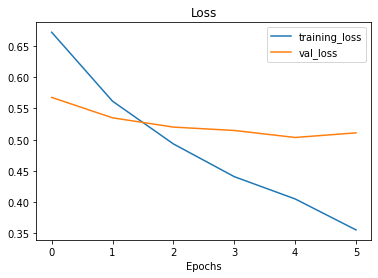

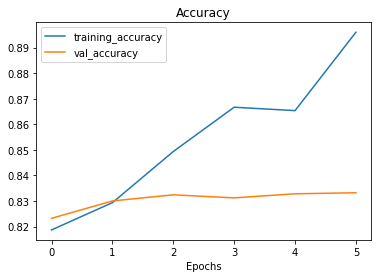

In [101]:
plot_loss_curves(hist_fine_3)

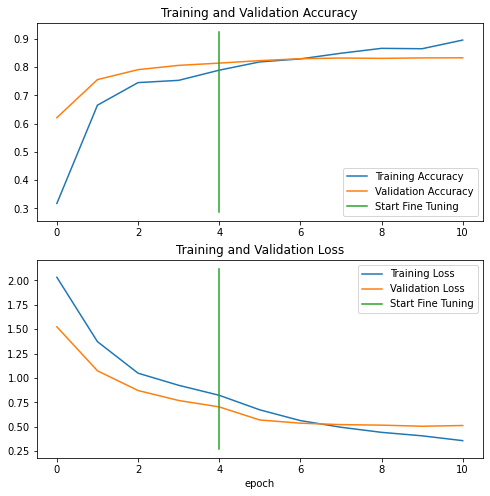

In [103]:
compare_historys(hist_3,hist_fine_3)

## Model 4: fine-tune existing model on the 100% data

In [74]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-12-31 14:53:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   189MB/s    in 2.6s    

2021-12-31 14:53:12 (189 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [77]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [80]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [104]:
## Evaluate test data
model_2.evaluate(test_data)

79/79 [==============================] - 4s 52ms/step - loss: 0.5110 - accuracy: 0.8332


[0.5110011100769043, 0.8331999778747559]

In [105]:
model_2.load_weights(checkpoint)

In [106]:
model_2.evaluate(test_data)

79/79 [==============================] - 4s 50ms/step - loss: 0.7021 - accuracy: 0.8144


[0.7020739912986755, 0.8144000172615051]

In [107]:
for i,layer in enumerate(model_2.layers):
  print(i,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_6 True
4 dense_5 True


In [108]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_8 False
1 rescaling_7 False
2 normalization_7 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [116]:
model_2.compile(loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(lr=0.0001),
            metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [117]:
hist_fine_100 = model_2.fit(train_data,
                           epochs=10,
                           steps_per_epoch=len(train_data),
                           initial_epoch=hist_3.epoch[-1],
                           validation_steps=len(test_data),
                           validation_data=test_data,
                           callbacks=[create_tensorboard_callback("fine_tuning","model_2_fine_100")])

Saving TensorBoard log files to: fine_tuning/model_2_fine_100/20211231-152528
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


235/235 [==============================] - 33s 103ms/step - loss: 0.7149 - accuracy: 0.7705 - val_loss: 0.3912 - val_accuracy: 0.8696
Epoch 6/10
235/235 [==============================] - 22s 93ms/step - loss: 0.5804 - accuracy: 0.8152 - val_loss: 0.3714 - val_accuracy: 0.8740
Epoch 7/10
235/235 [==============================] - 22s 91ms/step - loss: 0.5223 - accuracy: 0.8304 - val_loss: 0.3547 - val_accuracy: 0.8788
Epoch 8/10
235/235 [==============================] - 22s 91ms/step - loss: 0.4704 - accuracy: 0.8455 - val_loss: 0.3354 - val_accuracy: 0.8912
Epoch 9/10
235/235 [==============================] - 22s 92ms/step - loss: 0.4322 - accuracy: 0.8625 - val_loss: 0.3480 - val_accuracy: 0.8868
Epoch 10/10
235/235 [==============================] - 21s 89ms/step - loss: 0.4060 - accuracy: 0.8708 - val_loss: 0.3145 - val_accuracy: 0.8956


In [118]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 58ms/step - loss: 0.3145 - accuracy: 0.8956


[0.3145389258861542, 0.8956000208854675]

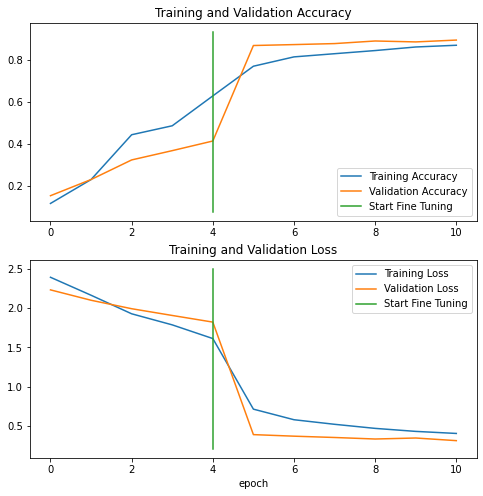

In [119]:
compare_historys(hist_2,hist_fine_100)

In [123]:
!tensorboard dev upload --logdir ./transfer_learning/ \
  --name "Transfer Learning Experiment with 10 Food101 Classes" \
  --description "A series of different transfer learning experinents with varying amount of data" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=mDl0RxLK6vwi1WGtYrl96sfcUrtLxB&prompt=consent&access_type=

In [124]:
!tensorboard dev list

https://tensorboard.dev/experiment/GRnrqtelReqrkcDQyB4dlQ/
	Name                 Transfer Learning Experiment with 10 Food101 Classes
	Description          A series of different transfer learning experinents with varying amount of data
	Id                   GRnrqtelReqrkcDQyB4dlQ
	Created              2021-12-31 15:45:25 (7 minutes ago)
	Updated              2021-12-31 15:45:39 (7 minutes ago)
	Runs                 27
	Tags                 5
	Scalars              384
	Tensor bytes         0
	Binary object bytes  12122795
https://tensorboard.dev/experiment/3FykoCa6QEec7pyJu2504Q/
	Name                 EfficientNetB0 vs Resnet50
	Description          Comparing Two different feature extraction model architectures
	Id                   3FykoCa6QEec7pyJu2504Q
	Created              2021-12-30 00:23:56
	Updated              2021-12-30 00:23:58
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  5925887
Total: 2 experiment(s)
